In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -qr requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17731, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 17731 (delta 51), reused 30 (delta 29), pack-reused 17642 (from 3)
Receiving objects: 100% (17731/17731), 17.10 MiB | 23.20 MiB/s, done.
Resolving deltas: 100% (12040/12040), done.
/content/yolov5/yolov5


In [ ]:
from google.colab import files

# Upload the two models
logo_model = files.upload()  # upload best.pt
ecode_model = files.upload()  # upload ecode_classifier_model.pkl


Saving best.pt to best.pt


Saving ecode_classifier_model.pkl to ecode_classifier_model.pkl


In [ ]:
%cd /content


/content


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -qr requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
!ls


benchmarks.py	 data	     LICENSE	     README.zh-CN.md   tutorial.ipynb
CITATION.cff	 detect.py   models	     requirements.txt  utils
classify	 export.py   pyproject.toml  segment	       val.py
CONTRIBUTING.md  hubconf.py  README.md	     train.py	       yolov5


In [ ]:
%cd /content


/content


In [ ]:
import torch, joblib

# Load YOLOv5 logo detection model
logo_model = torch.hub.load('/content/yolov5', 'custom', path='/content/best.pt', source='local')

# Load E-code classifier model
ecode_classifier = joblib.load('/content/ecode_classifier_model.pkl')

print("✅ Both models loaded successfully!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 v7.0-447-ge76591cb Python-3.12.12 torch-2.8.0+cu126 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


✅ Both models loaded successfully!


In [ ]:
!sudo apt install tesseract-ocr -y
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
import pytesseract
from PIL import Image

# Extract text from the uploaded image
text = pytesseract.image_to_string(Image.open(img_path))
print("🧾 Extracted Text:\n", text)

# You can test the E-code classifier here later once we reload the model.


🧾 Extracted Text:
  



YOLOv5 🚀 v7.0-447-ge76591cb Python-3.12.12 torch-2.8.0+cu126 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Saving Blog-Thumbnail-700-x-780-48.jpg to Blog-Thumbnail-700-x-780-48.jpg
Image uploaded: Blog-Thumbnail-700-x-780-48.jpg


/content/yolov5/models/common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 780x700 1 halal_logo
Speed: 12.7ms pre-process, 339.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 576)


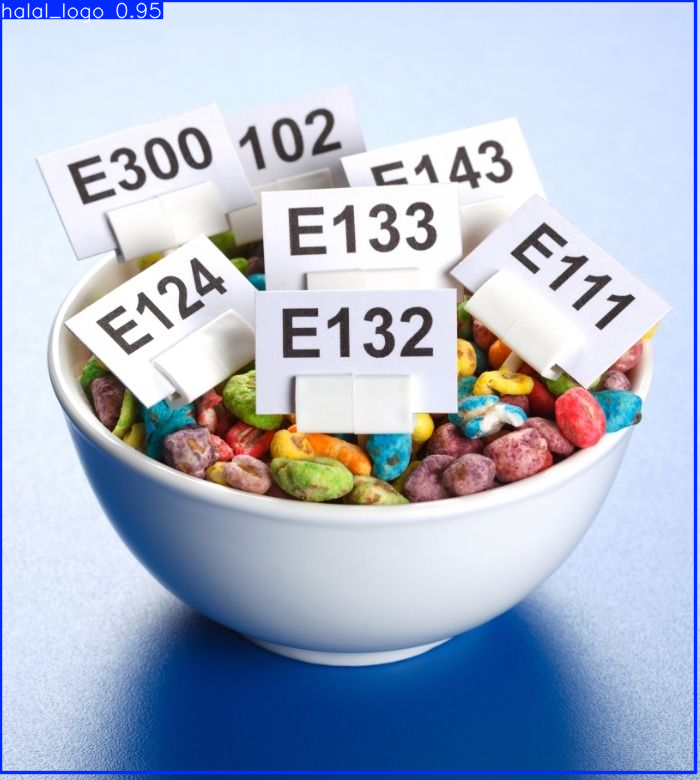

Saved 1 image to /content/detections9


✅ Halal logo detected!
🧾 Detected text:  

⚠️ No E-code found in text.


In [ ]:
import cv2
from PIL import Image
import torch
import joblib
import numpy as np
from matplotlib import pyplot as plt

# --- Load models (you’ve already done this earlier) ---
logo_model = torch.hub.load('/content/yolov5', 'custom', path='/content/best.pt', source='local')

ecode_classifier = joblib.load('/content/ecode_classifier_model.pkl')

# --- Step 1: Upload a product image ---
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    print(f"Image uploaded: {img_path}")

# --- Step 2: Run halal logo detection ---
results = logo_model(img_path)
results.print()

# --- Step 3: Display detections ---
results.show()

# --- Step 4: Save detection results (optional) ---
results.save(save_dir="/content/detections")

# --- Step 5: Extract detected regions (if any) ---
detections = results.pandas().xyxy[0]

if len(detections) > 0:
    print("✅ Halal logo detected!")
else:
    print("❌ No halal logo detected.")

# --- Step 6: (Optional) Extract text from image for E-code classification ---
import pytesseract

text = pytesseract.image_to_string(Image.open(img_path))
print("🧾 Detected text:", text)

# --- Step 7: Classify E-code if found ---
ecode_found = None
for word in text.split():
    if word.lower().startswith('e') and word[1:].isdigit():
        ecode_found = word
        break

if ecode_found:
    print("🔍 Found E-code:", ecode_found)
    # Predict class (halal/haram/doubtful)
    prediction = ecode_classifier.predict([ecode_found])
    print("✅ E-code classification:", prediction[0])
else:
    print("⚠️ No E-code found in text.")


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


YOLOv5 🚀 v7.0-447-ge76591cb Python-3.12.12 torch-2.8.0+cu126 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


✅ Models loaded
Upload product image now (use the file picker)...


Saving apricot-jam-label-analysis.webp to apricot-jam-label-analysis (2).webp
Running analysis on: /content/apricot-jam-label-analysis (2).webp


/content/yolov5/models/common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):



Pipeline Result:
{
  "image": "apricot-jam-label-analysis (2).webp",
  "halal_logo_detected": true,
  "detections": [
    {
      "xmin": 3.4420275688171387,
      "ymin": 0.9502681493759155,
      "xmax": 481.7240295410156,
      "ymax": 636.4249267578125,
      "confidence": 0.9422475695610046,
      "class": 0,
      "name": "halal_logo"
    }
  ],
  "ecodes": {},
  "final_status": "Halal"
}

Annotated image saved at: /content/output_annotated.png


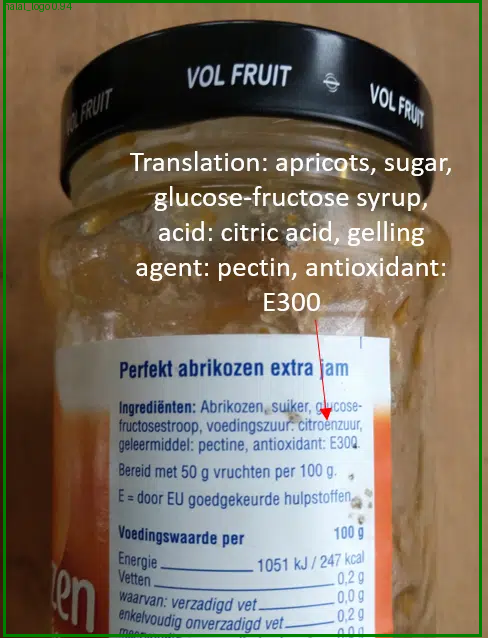

'JSON saved at /content/final_output.json'

NameError: name 'raw_text' is not defined

In [ ]:
# FULL PIPELINE: Upload → Logo detect → OCR (preproc) → E-code extract → classify → save output

# 0) (If needed) install dependencies (you likely already have these)
!pip install joblib pytesseract opencv-python pillow --quiet
!apt-get update -qq && apt-get install -y -qq tesseract-ocr

# 1) imports
import os, re, json, cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import torch, joblib
import pytesseract
from google.colab import files
import matplotlib.pyplot as plt

# 2) load models (adjust paths if different)
YOLO_DIR = "/content/yolov5"     # must exist (you cloned earlier)
YOLO_MODEL_PATH = "/content/best.pt"   # upload to /content first
ECODE_MODEL_PATH = "/content/ecode_classifier_model.pkl"  # upload to /content

# load YOLOv5 custom model
logo_model = torch.hub.load(YOLO_DIR, 'custom', path=YOLO_MODEL_PATH, source='local')
# load E-code classifier
ecode_classifier = joblib.load(ECODE_MODEL_PATH)

print("✅ Models loaded")

# 3) helper functions

def preprocess_for_ocr(cv_img, scale_width=None):
    """Return preprocessed image (grayscale, denoise, adaptive thresh) for better OCR."""
    img = cv_img.copy()
    if scale_width:
        h, w = img.shape[:2]
        new_w = scale_width
        new_h = int(h * new_w / w)
        img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # denoise
    gray = cv2.fastNlMeansDenoising(gray, h=10)
    # increase contrast / equalize
    gray = cv2.equalizeHist(gray)
    # adaptive threshold (keeps text readable)
    th = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)
    return th

def find_ecodes_in_text(text):
    """Return list of normalized E-codes found in OCR text (E### or E####)."""
    # common formats sometimes E-120 or E 120, account for that
    # capture E or e followed by optional non-digits and 3-4 digits
    raw = re.findall(r"[Ee][\s\-]?\d{3,4}", text)
    # normalize (remove spaces/dashes)
    normalized = [re.sub(r"[^\dEe]", "", s).upper() for s in raw]
    return normalized

def ocr_find_ecodes_by_words(cv_img):
    """Use pytesseract.word-detection to find text boxes and return codes with bounding boxes."""
    # preprocess scaled for better small text reading
    pre = preprocess_for_ocr(cv_img, scale_width=1200)
    pil = Image.fromarray(pre)
    data = pytesseract.image_to_data(pil, output_type=pytesseract.Output.DICT)
    ecodes = []
    for i, text in enumerate(data['text']):
        if not text or text.strip() == "":
            continue
        # clean text token for patterns like E120, E-120, e 120
        token = text.strip()
        matches = re.findall(r"[Ee][\s\-]?\d{3,4}", token)
        if matches:
            for m in matches:
                norm = re.sub(r"[^\dEe]", "", m).upper()
                # bounding box
                x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
                ecodes.append((norm, (x, y, w, h)))
    return ecodes

def draw_annotations(orig_img_path, detections, ecodes_with_boxes, output_path="/content/output_annotated.png"):
    """Draws YOLO boxes and E-code boxes on image and saves annotated image."""
    img = Image.open(orig_img_path).convert("RGB")
    draw = ImageDraw.Draw(img)
    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20)
    except:
        font = ImageFont.load_default()

    # draw YOLO boxes
    for _, row in detections.iterrows():
        x1, y1, x2, y2 = int(row.xmin), int(row.ymin), int(row.xmax), int(row.ymax)
        label = f"{row['name']} {row['confidence']:.2f}"
        draw.rectangle([x1, y1, x2, y2], outline="green", width=3)
        draw.text((x1, max(y1-22,0)), label, fill="green", font=font)

    # draw ecode boxes
    for code, box in ecodes_with_boxes:
        x, y, w, h = box
        draw.rectangle([x, y, x+w, y+h], outline="red", width=3)
        draw.text((x, max(y-18,0)), code, fill="red", font=font)

    img.save(output_path)
    return output_path

# 4) main analysis function
def analyze_product(image_path, save_json="/content/final_output.json", save_annot="/content/output_annotated.png"):
    """
    Process single image: detect halal logo, perform OCR, extract E-codes, classify them.
    Returns the result dict and writes JSON + annotated image.
    """
    # read image
    cv_img = cv2.imread(image_path)
    if cv_img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")

    # 1) YOLO logo detection
    results = logo_model(image_path)           # returns Ultralytics results object
    det_df = results.pandas().xyxy[0]          # dataframe: xmin,ymin,xmax,ymax,confidence,class,name

    halal_logo_detected = len(det_df) > 0

    # 2) OCR whole-image (raw) and preprocessed
    # Raw OCR
    pil_img = Image.open(image_path)
    raw_text = pytesseract.image_to_string(pil_img)

    # Preprocessed OCR (better for small/low-contrast text)
    pre_img = preprocess_for_ocr(cv_img, scale_width=1200)
    pre_text = pytesseract.image_to_string(Image.fromarray(pre_img))

    # Combined text
    combined_text = (raw_text + "\n" + pre_text).strip()

    # 3) E-codes extraction (from text)
    ecodes_from_text = find_ecodes_in_text(combined_text)

    # 4) Find ecode boxes via word-level OCR
    ecodes_with_boxes = ocr_find_ecodes_by_words(cv_img)  # list of (code, (x,y,w,h))

    # Add codes from text that didn't have boxes (use None box)
    for c in ecodes_from_text:
        if c not in [x[0] for x in ecodes_with_boxes]:
            ecodes_with_boxes.append((c, None))

    # 5) Classify each E-code
    classified = {}
    for code, box in ecodes_with_boxes:
        label = ecode_classifier.predict([code])[0]  # model expects list-like input
        classified[code] = {"label": label, "box": box}

    # 6) Decide final verdict
    # Priority: detected official Halal logo => Halal
    # Otherwise if any E-code classified as Haram => Haram
    # Otherwise if any Doubtful => Doubtful, else Unknown
    if halal_logo_detected:
        final_status = "Halal"
    elif any(info["label"].lower() == "haram" for info in classified.values()):
        final_status = "Haram"
    elif any(info["label"].lower() in ("mushbooh","doubtful","uncertain") for info in classified.values()):
        final_status = "Doubtful"
    elif len(classified) > 0:
        final_status = "Unknown (E-codes found but not haram/doubtful)"
    else:
        final_status = "Unknown (no logo or E-codes detected)"

    # 7) Annotate & save image
    # convert boxes with None to a small placeholder (we won't draw None)
    ecodes_boxes_for_drawing = [(c, b) for c,b in ecodes_with_boxes if b is not None]
    annotated_path = draw_annotations(image_path, det_df, ecodes_boxes_for_drawing, output_path=save_annot)

    # 8) Build result dictionary
    result = {
        "image": os.path.basename(image_path),
        "halal_logo_detected": bool(halal_logo_detected),
        "detections": det_df.to_dict(orient="records"),
        "ecodes": classified,
        "final_status": final_status
    }

    # save JSON
    with open(save_json, "w") as f:
        json.dump(result, f, indent=2)

    return result, annotated_path

# 5) Interactive: upload + run
print("Upload product image now (use the file picker)...")
uploaded = files.upload()
for name in uploaded:
    in_path = f"/content/{name}"
    print("Running analysis on:", in_path)
    result, annotated = analyze_product(in_path)
    print("\nPipeline Result:")
    print(json.dumps(result, indent=2))
    print("\nAnnotated image saved at:", annotated)
    display(Image.open(annotated))
    display("JSON saved at /content/final_output.json")
# Print OCR raw text and preprocessed text
print("Raw OCR Text:", raw_text)
print("Preprocessed OCR Text:", pre_text)

# Print extracted E-codes
print("Extracted E-codes:", ecodes_from_text)

# Print classified E-codes
print("Classified E-codes:", classified)

# Print final decision
print("Final Status:", final_status)


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


YOLOv5 🚀 v7.0-447-ge76591cb Python-3.12.12 torch-2.8.0+cu126 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


✅ Models successfully loaded.

📤 Upload a product image to start analysis...


Saving close-up-shot-of-bisto-cheese-sauce-mix-ingredient-list-showing-e-numbers-e322-e621-focus-centre-numbers-for-food-additives-whats-in-your-food-2FN1R58.jpg to close-up-shot-of-bisto-cheese-sauce-mix-ingredient-list-showing-e-numbers-e322-e621-focus-centre-numbers-for-food-additives-whats-in-your-food-2FN1R58 (2).jpg

🔍 Processing image: /content/close-up-shot-of-bisto-cheese-sauce-mix-ingredient-list-showing-e-numbers-e322-e621-focus-centre-numbers-for-food-additives-whats-in-your-food-2FN1R58 (2).jpg


/content/yolov5/models/common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Logo detections: 1 | Halal logo detected: True

--- OCR OUTPUTS ---
Raw OCR Text:
       

a

jy, Maltodexttin| Pa

  
   

  

id
y asien's* a oa ) MA ae Say ed Naine sa
; We wile Feat Pam J), Suse": \nirey Powder
4) yese'? ao sono BU
| at -*
mites’ eS
a


Preprocessed OCR Text:
 ) “Sue

Bo oe

agi a \ re
33) (eon ars
oP

 


Extracted E-codes from text: []
E-codes with bounding boxes: []

Classified E-codes: {}

Final Decision: Halal

✅ Results saved:
Annotated image: /content/output_annotated.png
JSON file: /content/final_output.json

--- PIPELINE RESULT ---
{
  "image": "close-up-shot-of-bisto-cheese-sauce-mix-ingredient-list-showing-e-numbers-e322-e621-focus-centre-numbers-for-food-additives-whats-in-your-food-2FN1R58 (2).jpg",
  "halal_logo_detected": true,
  "detections": [
    {
      "xmin": 0.0,
      "ymin": 171.51925659179688,
      "xmax": 865.477294921875,
      "ymax": 1343.6566162109375,
      "confidence": 0.9552517533302307,
      "class": 0,
      "name": "halal_lo

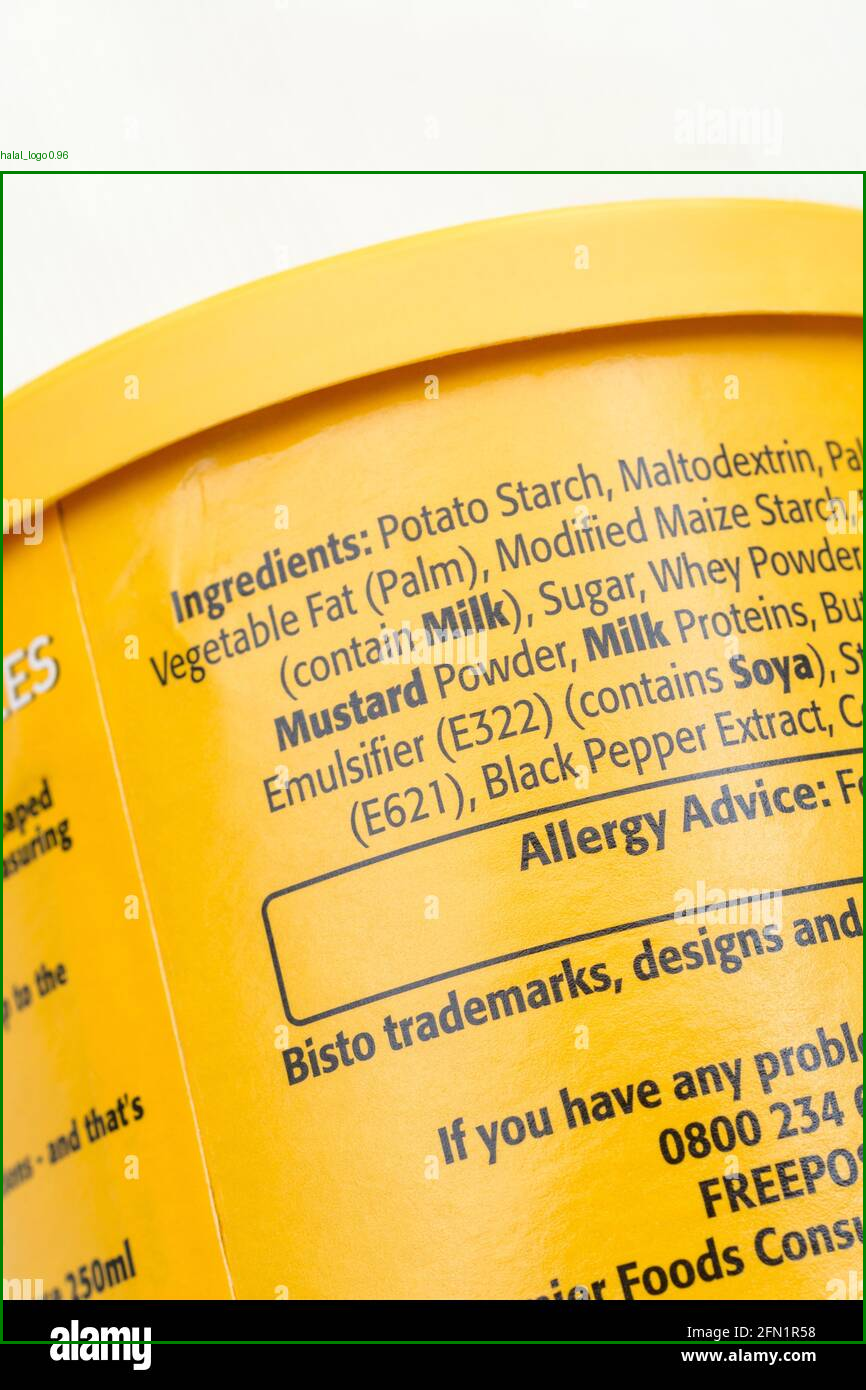

JSON saved at /content/final_output.json


In [ ]:
# ===============================================================
# PRODUCT ANALYSIS PIPELINE
# Upload → Logo detect (YOLOv5) → OCR (Tesseract) → E-code extract → classify → output JSON + annotated image
# ===============================================================

# 0) INSTALL DEPENDENCIES  -------------------------------------
!pip install joblib pytesseract opencv-python pillow matplotlib --quiet
!apt-get update -qq && apt-get install -y -qq tesseract-ocr

# 1) IMPORTS  ---------------------------------------------------
import os, re, json, cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import torch, joblib
import pytesseract
from google.colab import files
import matplotlib.pyplot as plt

# 2) LOAD MODELS  ----------------------------------------------
YOLO_DIR = "/content/yolov5"                  # should contain yolov5 repo
YOLO_MODEL_PATH = "/content/best.pt"          # your trained logo detector
ECODE_MODEL_PATH = "/content/ecode_classifier_model.pkl"  # your trained classifier

if not os.path.exists(YOLO_MODEL_PATH):
    raise FileNotFoundError("❌ YOLO model file not found. Please upload best.pt to /content.")

if not os.path.exists(ECODE_MODEL_PATH):
    raise FileNotFoundError("❌ E-code classifier model not found. Please upload ecode_classifier_model.pkl to /content.")

# load YOLOv5 model
logo_model = torch.hub.load(YOLO_DIR, 'custom', path=YOLO_MODEL_PATH, source='local')
# load E-code classifier
ecode_classifier = joblib.load(ECODE_MODEL_PATH)

print("✅ Models successfully loaded.")


# 3) HELPER FUNCTIONS  ------------------------------------------

def preprocess_for_ocr(cv_img, scale_width=None):
    """Return preprocessed image (grayscale, denoise, adaptive thresh) for better OCR."""
    img = cv_img.copy()
    if scale_width:
        h, w = img.shape[:2]
        new_h = int(h * scale_width / w)
        img = cv2.resize(img, (scale_width, new_h), interpolation=cv2.INTER_LINEAR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.fastNlMeansDenoising(gray, h=10)
    gray = cv2.equalizeHist(gray)
    th = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)
    return th


def find_ecodes_in_text(text):
    """Return list of normalized E-codes found in OCR text (E### or E####)."""
    raw = re.findall(r"[Ee][\s\-]?\d{3,4}", text)
    normalized = [re.sub(r"[^\dEe]", "", s).upper() for s in raw]
    return normalized


def ocr_find_ecodes_by_words(cv_img):
    """Detect E-codes using pytesseract word-level boxes."""
    pre = preprocess_for_ocr(cv_img, scale_width=1200)
    pil = Image.fromarray(pre)
    data = pytesseract.image_to_data(pil, output_type=pytesseract.Output.DICT)
    ecodes = []
    for i, text in enumerate(data['text']):
        if not text.strip():
            continue
        matches = re.findall(r"[Ee][\s\-]?\d{3,4}", text.strip())
        if matches:
            for m in matches:
                norm = re.sub(r"[^\dEe]", "", m).upper()
                x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
                ecodes.append((norm, (x, y, w, h)))
    return ecodes


def draw_annotations(orig_img_path, detections, ecodes_with_boxes, output_path="/content/output_annotated.png"):
    """Draw YOLO logo detections (green) and E-code boxes (red) on image."""
    img = Image.open(orig_img_path).convert("RGB")
    draw = ImageDraw.Draw(img)
    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 20)
    except:
        font = ImageFont.load_default()

    # draw YOLO boxes
    for _, row in detections.iterrows():
        x1, y1, x2, y2 = int(row.xmin), int(row.ymin), int(row.xmax), int(row.ymax)
        label = f"{row['name']} {row['confidence']:.2f}"
        draw.rectangle([x1, y1, x2, y2], outline="green", width=3)
        draw.text((x1, max(y1 - 22, 0)), label, fill="green", font=font)

    # draw ecode boxes
    for code, box in ecodes_with_boxes:
        x, y, w, h = box
        draw.rectangle([x, y, x + w, y + h], outline="red", width=3)
        draw.text((x, max(y - 18, 0)), code, fill="red", font=font)

    img.save(output_path)
    return output_path


# 4) MAIN ANALYSIS FUNCTION  ------------------------------------

def analyze_product(image_path, save_json="/content/final_output.json", save_annot="/content/output_annotated.png"):
    """Main pipeline: detect logo → OCR → E-code → classify → save results."""
    print(f"\n🔍 Processing image: {image_path}")

    cv_img = cv2.imread(image_path)
    if cv_img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")

    # ---- Step 1: YOLO logo detection ----
    results = logo_model(image_path)
    det_df = results.pandas().xyxy[0]
    halal_logo_detected = len(det_df) > 0
    print(f"Logo detections: {len(det_df)} | Halal logo detected: {halal_logo_detected}")

    # ---- Step 2: OCR (raw + preprocessed) ----
    pil_img = Image.open(image_path)
    raw_text = pytesseract.image_to_string(pil_img)
    pre_img = preprocess_for_ocr(cv_img, scale_width=1200)
    pre_text = pytesseract.image_to_string(Image.fromarray(pre_img))
    combined_text = (raw_text + "\n" + pre_text).strip()

    print("\n--- OCR OUTPUTS ---")
    print("Raw OCR Text:\n", raw_text)
    print("\nPreprocessed OCR Text:\n", pre_text)

    # ---- Step 3: Extract E-codes from text ----
    ecodes_from_text = find_ecodes_in_text(combined_text)
    print("\nExtracted E-codes from text:", ecodes_from_text)

    # ---- Step 4: Word-level OCR bounding boxes ----
    ecodes_with_boxes = ocr_find_ecodes_by_words(cv_img)
    print("E-codes with bounding boxes:", ecodes_with_boxes)

    # Add missing text-only E-codes
    for c in ecodes_from_text:
        if c not in [x[0] for x in ecodes_with_boxes]:
            ecodes_with_boxes.append((c, None))

    # ---- Step 5: Classify E-codes ----
    classified = {}
    for code, box in ecodes_with_boxes:
        try:
            label = ecode_classifier.predict([code])[0]
        except Exception as e:
            label = f"Error: {e}"
        classified[code] = {"label": label, "box": box}

    print("\nClassified E-codes:", classified)

    # ---- Step 6: Final status decision ----
    if halal_logo_detected:
        final_status = "Halal"
    elif any(info["label"].lower() == "haram" for info in classified.values()):
        final_status = "Haram"
    elif any(info["label"].lower() in ("mushbooh", "doubtful", "uncertain") for info in classified.values()):
        final_status = "Doubtful"
    elif len(classified) > 0:
        final_status = "Unknown (E-codes found but not haram/doubtful)"
    else:
        final_status = "Unknown (no logo or E-codes detected)"

    print("\nFinal Decision:", final_status)

    # ---- Step 7: Annotate & save image ----
    ecodes_boxes_for_drawing = [(c, b) for c, b in ecodes_with_boxes if b is not None]
    annotated_path = draw_annotations(image_path, det_df, ecodes_boxes_for_drawing, output_path=save_annot)

    # ---- Step 8: Save results to JSON ----
    result = {
        "image": os.path.basename(image_path),
        "halal_logo_detected": bool(halal_logo_detected),
        "detections": det_df.to_dict(orient="records"),
        "ecodes": classified,
        "final_status": final_status
    }

    with open(save_json, "w") as f:
        json.dump(result, f, indent=2)

    print("\n✅ Results saved:")
    print("Annotated image:", annotated_path)
    print("JSON file:", save_json)

    return result, annotated_path


# 5) INTERACTIVE EXECUTION  -------------------------------------
print("\n📤 Upload a product image to start analysis...")
uploaded = files.upload()

for name in uploaded:
    in_path = f"/content/{name}"
    result, annotated = analyze_product(in_path)

    print("\n--- PIPELINE RESULT ---")
    print(json.dumps(result, indent=2))

    display(Image.open(annotated))
    print("JSON saved at /content/final_output.json")
